In [1]:
import torch
import numpy as np

Instead of `np.array`, we use `torch.tensor`:

In [2]:
np.array([5., 3.]), torch.tensor([5., 3.])

(array([5., 3.]), tensor([5., 3.]))

But we can pass data back and forth between numpy and torch like so:

In [3]:
x = np.array([10., 5., 1.])
y = torch.tensor(x)
z = np.array(y)
x, y, z

(array([10.,  5.,  1.]),
 tensor([10.,  5.,  1.], dtype=torch.float64),
 array([10.,  5.,  1.]))

Create a vector of 10 zeros:

In [4]:
x = torch.zeros(10)
x

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Add 1 to each element:

In [5]:
x + 1

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Generate random numbers:

In [6]:
x = torch.randn(10)
x

tensor([ 1.4513,  0.2353,  0.8942, -0.6773, -0.3006, -0.0217,  0.3978,  1.5993,
         0.6362, -0.2877])

Do some basic operations, all with numpy syntax:

In [7]:
torch.cos(x), torch.log(torch.abs(x) + 1), torch.sum(x), x.std()

(tensor([ 0.1192,  0.9724,  0.6261,  0.7793,  0.9552,  0.9998,  0.9219, -0.0285,
          0.8043,  0.9589]),
 tensor([0.8966, 0.2113, 0.6388, 0.5172, 0.2628, 0.0215, 0.3349, 0.9552, 0.4924,
         0.2528]),
 tensor(3.9269),
 tensor(0.7581))

Now, let's do stuff on an accelerator (GPU, TPU, etc.). 

Let's declare a device based on what is available:

In [8]:
x = torch.randn((100, 100))

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#Move to GPU:
x = x.to(device)
x

tensor([[ 0.3436,  0.0878, -1.1026,  ...,  1.8206, -0.2170, -0.6178],
        [-0.6395, -0.2141, -0.8939,  ..., -0.6335,  0.8056, -1.3851],
        [-0.3088, -1.1639, -1.0423,  ..., -1.1203,  0.8599, -0.0427],
        ...,
        [ 0.0649, -0.2906,  0.4749,  ...,  0.5203, -0.1994,  1.1068],
        [-1.7693, -0.6290, -1.1080,  ..., -1.1024,  0.5243,  0.0168],
        [-0.2427, -0.9125, -1.3074,  ..., -0.1162, -0.8049,  0.5222]])

So the vector is on the GPU (if you have CUDA set up). We can do vector operations all on the GPU now:

In [9]:
y = x**3 + torch.cos(x) - x.mean()
y

tensor([[ 0.9828,  0.9975, -0.8883,  ...,  5.7883,  0.9670,  0.5801],
        [ 0.5416,  0.9680, -0.0871,  ...,  0.5524,  1.2161, -2.4719],
        [ 0.9239, -1.1804, -0.6274,  ..., -0.9699,  1.2890,  0.9997],
        ...,
        [ 0.9988,  0.9342,  0.9971,  ...,  1.0092,  0.9729,  1.8039],
        [-5.7355,  0.5604, -0.9131,  ..., -0.8874,  1.0104,  1.0005],
        [ 0.9571, -0.1475, -1.9736,  ...,  0.9924,  0.1724,  1.0098]])

And move back to the CPU like so:

In [10]:
z = y.cpu()
z

tensor([[ 0.9828,  0.9975, -0.8883,  ...,  5.7883,  0.9670,  0.5801],
        [ 0.5416,  0.9680, -0.0871,  ...,  0.5524,  1.2161, -2.4719],
        [ 0.9239, -1.1804, -0.6274,  ..., -0.9699,  1.2890,  0.9997],
        ...,
        [ 0.9988,  0.9342,  0.9971,  ...,  1.0092,  0.9729,  1.8039],
        [-5.7355,  0.5604, -0.9131,  ..., -0.8874,  1.0104,  1.0005],
        [ 0.9571, -0.1475, -1.9736,  ...,  0.9924,  0.1724,  1.0098]])

PyTorch also lets you do autodifferentiation, which is a big part of deep learning. Let's look at the gradient of $\sum_i \cos(x_i)^2$:

In [11]:
def my_func(x):
    return (torch.cos(x)**2).sum()

First, we make our variable know that it should record gradients as it is operated upon with the `requires_grad` flag:

In [12]:
x = torch.tensor([np.pi/4, np.pi/8])
x.requires_grad = True

Now, we take the gradient at each of $x=({\pi \over 4}, {\pi \over 8})$, which is -2 \cos(x) \sin(x):

In [13]:
torch.autograd.grad(my_func(x), x)

(tensor([-1.0000, -0.7071]),)

We can also do this all on the GPU! We can also do higher-order derivatives by repeatedly calling grad.

In [14]:
y = x.to(device)
torch.autograd.grad(my_func(y), y)

(tensor([-1.0000, -0.7071]),)

With gradient information, one can do gradient descent operation on a model using `torch.optim.SGD`:

In [15]:
torch.optim.SGD;

One can write a class that inherits from `torch.nn.Module`, declares `torch.nn.Parameters(...)` around its parameters, and then `torch.optim.SGD` can optimize those. This is how all deep learning works: gradient-based optimization of some highly-flexible differentiable model.

### Introducing Linear Models
Linear models are fundamental in machine learning, offering a straightforward way to predict an output as a weighted sum of inputs plus a bias. Here, we define a linear model with `nn.Linear(2, 1)`, indicating it takes two input features and produces one output.

In [16]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

linear_model = nn.Linear(2, 1)

To explore how our linear model behaves, we generate a grid of points in 2D space. This allows us to visualize the model's predictions across a range of inputs.

In [17]:
x = torch.rand(1000, 2) * 20 - 10  # Generate some points in the range [-10, 10] for both dimensions
y = linear_model(x)  # Apply the linear model

It's instructive to look at the model's parameters. The `weight` and `bias` are key to understanding how inputs are transformed into outputs. Initially, these are randomly set.

In [18]:
print("Weights:", linear_model.weight)
print("Bias:", linear_model.bias)

Weights: Parameter containing:
tensor([[0.1141, 0.3807]], requires_grad=True)
Bias: Parameter containing:
tensor([0.1048], requires_grad=True)


By plotting the model's output against one of the input features, we can see how the model linearly maps input to output. This visualization helps in understanding the effect of model parameters.

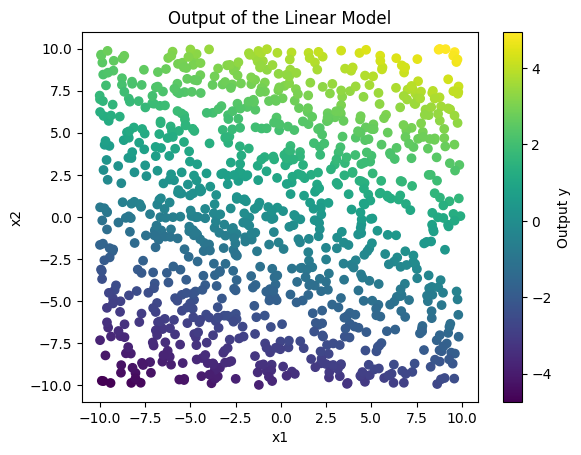

In [19]:
# Plot 2D with color=output
xp = x.detach().numpy()
yp = y.detach().numpy()
plt.scatter(xp[:, 0], xp[:, 1], c=yp[:, 0])
cbar = plt.colorbar()
cbar.set_label('Output y')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Output of the Linear Model')
plt.show()

### Computing Gradients
Gradients are crucial for optimizing our model. They indicate the direction to adjust our parameters to reduce the loss. By computing the loss with a simple target, we can see how PyTorch automatically computes gradients.

In [20]:
target = torch.rand(*y.shape) * 20 - 10  # Generate some target values for demonstration
loss_fn = nn.MSELoss()  # Mean Squared Error Loss
loss = loss_fn(y, target)  # Compute the loss
# Equivalently: loss = (y - target).pow(2).mean()
loss.backward()  # Backpropagate to compute gradients

print("Gradient on weights:", linear_model.weight.grad)
print("Gradient on bias:", linear_model.bias.grad)

Gradient on weights: tensor([[ 7.1980, 30.9301]])
Gradient on bias: tensor([-0.1465])


### Shallow Neural Networks

Shallow neural networks introduce non-linearity, allowing for more complex mappings from input to output.

Here, we add a ReLU activation function between two linear transforms - i.e., one hidden layer.

In [21]:
class ShallowNN(nn.Module):
    def __init__(self):
        super(ShallowNN, self).__init__()
        self.layer1 = nn.Linear(1, 3)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(3, 1)

    def forward(self, x):
        x = self.relu(self.layer1(x))  # Apply first layer and activation
        return self.layer2(x)  # Apply second layer

shallow_nn = ShallowNN()

In [22]:
x = torch.linspace(-10, 10, 1000).view(-1, 1)
y_nn = shallow_nn(x)

Text(0.5, 1.0, 'Output of the Shallow Neural Network')

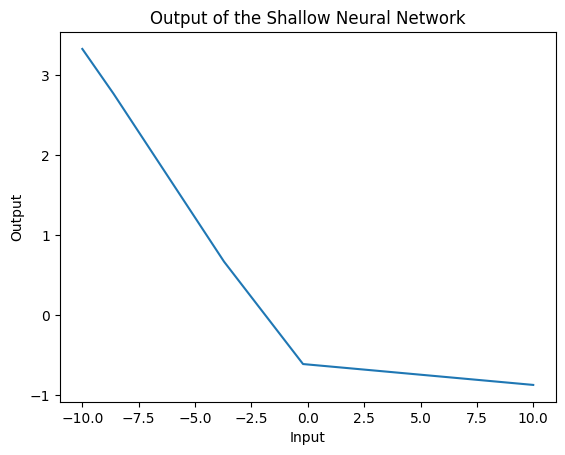

In [23]:
xp = x.detach().numpy()
yp_nn = y_nn.detach().numpy()
plt.plot(xp, yp_nn)
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Output of the Shallow Neural Network')

In [24]:

class DeepNN(nn.Module):
    def __init__(self, hidden=3):
        super(DeepNN, self).__init__()
        self.layer1 = nn.Linear(1, hidden)  # Adjusted to 3 neurons
        self.relu1 = nn.ReLU()
        self.layer2 = nn.Linear(hidden, hidden)  # Adjusted to 3 neurons
        self.relu2 = nn.ReLU()
        self.output_layer = nn.Linear(hidden, 1)

    def forward(self, x):
        x = self.relu1(self.layer1(x))
        x = self.relu2(self.layer2(x))
        return self.output_layer(x)

deep_nn = DeepNN()

Parameters before optimization:

In [25]:
for name, param in deep_nn.named_parameters():
    print(f"{name}: {param.data}")

layer1.weight: tensor([[-0.3130],
        [-0.5103],
        [-0.8914]])
layer1.bias: tensor([-0.6306,  0.0804, -0.4442])
layer2.weight: tensor([[-0.4589, -0.2941,  0.2435],
        [ 0.2155,  0.1493, -0.1775],
        [ 0.1825, -0.1932,  0.4377]])
layer2.bias: tensor([-0.3755, -0.2841, -0.4284])
output_layer.weight: tensor([[ 0.1039, -0.0869,  0.2872]])
output_layer.bias: tensor([-0.3639])


With simple gradient descent (or Adam), with $\alpha=0.01$:


In [26]:
optimizer = torch.optim.SGD(deep_nn.parameters(), lr=0.01)
# optimizer = torch.optim.Adam(deep_nn.parameters(), lr=0.01)

Let's say we wish to fit $\sin(x)$:

In [27]:
x = torch.linspace(-10, 10, 1000).view(-1, 1)
target = torch.sin(x)

loss_fn = nn.MSELoss()
target = torch.sin(x)
loss = loss_fn(deep_nn(x), target)

We can call `.backward()` on the output, which *sends the gradient back through the network*:

In [28]:
loss.backward()

Next, if we call `.step()` on our optimizer (which is tracking our parameters), it will update the parameters based on the gradients:

In [29]:
optimizer.step()

Parameters after SGD optimization:

In [30]:
for name, param in deep_nn.named_parameters():
    print(f"{name}: {param.data}")

layer1.weight: tensor([[-0.3124],
        [-0.5109],
        [-0.8900]])
layer1.bias: tensor([-0.6306,  0.0804, -0.4443])
layer2.weight: tensor([[-0.4589, -0.2941,  0.2435],
        [ 0.2155,  0.1493, -0.1775],
        [ 0.1816, -0.1948,  0.4349]])
layer2.bias: tensor([-0.3755, -0.2841, -0.4285])
output_layer.weight: tensor([[ 0.1039, -0.0869,  0.2837]])
output_layer.bias: tensor([-0.3597])


We can do the same for the optimizer parameters

In [31]:
optimizer.state_dict()

{'state': {0: {'momentum_buffer': None},
  1: {'momentum_buffer': None},
  2: {'momentum_buffer': None},
  3: {'momentum_buffer': None},
  4: {'momentum_buffer': None},
  5: {'momentum_buffer': None}},
 'param_groups': [{'lr': 0.01,
   'momentum': 0,
   'dampening': 0,
   'weight_decay': 0,
   'nesterov': False,
   'maximize': False,
   'foreach': None,
   'differentiable': False,
   'params': [0, 1, 2, 3, 4, 5]}]}

Reset gradients with `.zero_grad()`.

**(Important: you should always do this at the end of a step; otherwise you will accumulate gradients!)**

In [32]:
optimizer.zero_grad()

Basic training loop:

In [33]:
net = DeepNN(hidden=10)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

net.to(device)

DeepNN(
  (layer1): Linear(in_features=1, out_features=10, bias=True)
  (relu1): ReLU()
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (relu2): ReLU()
  (output_layer): Linear(in_features=10, out_features=1, bias=True)
)

Let's look at it before training:

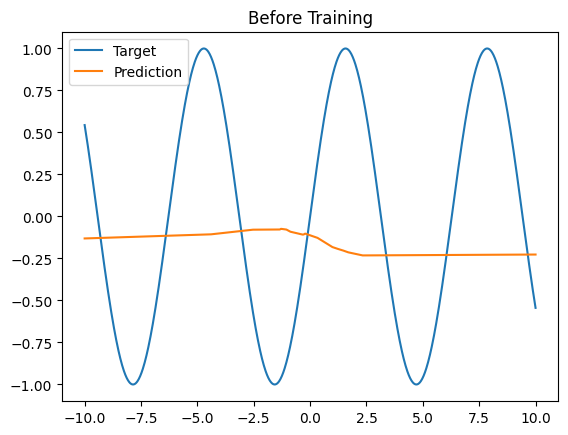

In [34]:
def make_plot(net, label):
    x = torch.linspace(-10, 10, 1000).view(-1, 1).to(device)
    y = torch.sin(x).to(device)

    init_out = net(x)

    plt.figure()
    plt.plot(x.cpu().detach().numpy(), y.cpu().detach().numpy(), label='Target')
    plt.plot(x.cpu().detach().numpy(), init_out.cpu().detach().numpy(), label='Prediction')
    plt.legend()
    plt.title(label)

make_plot(net, 'Before Training')

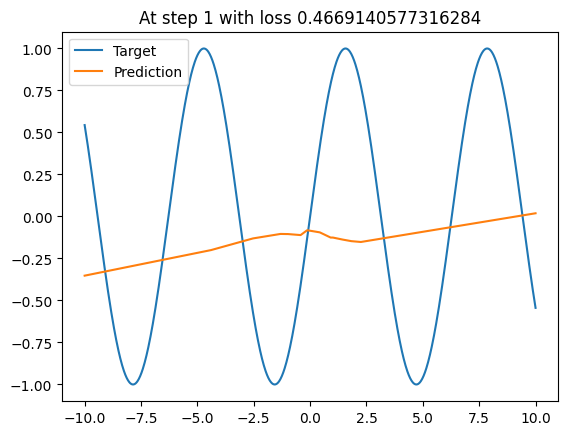

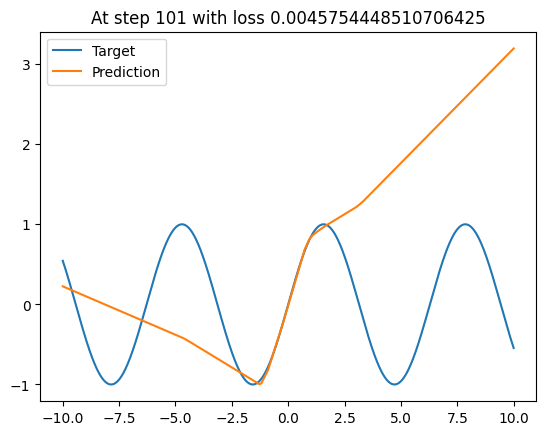

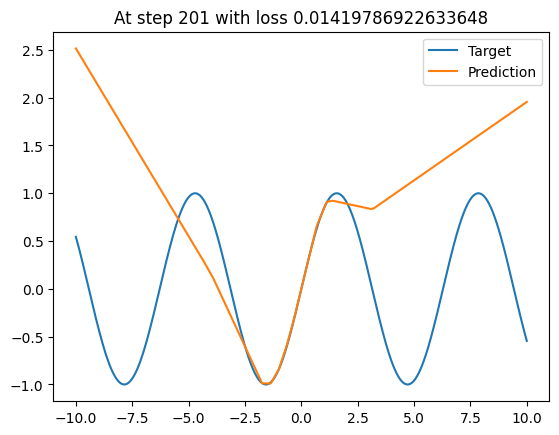

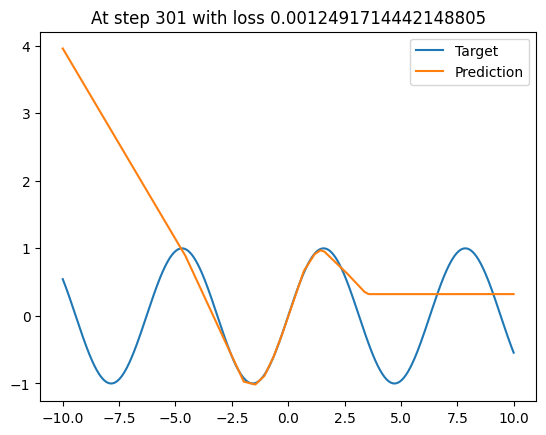

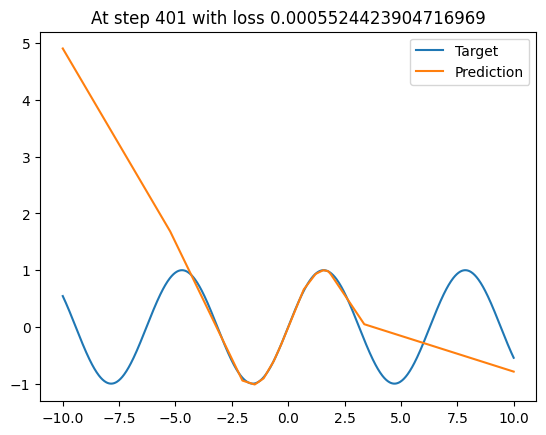

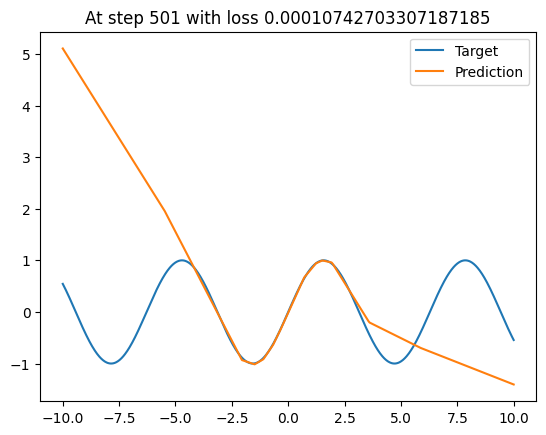

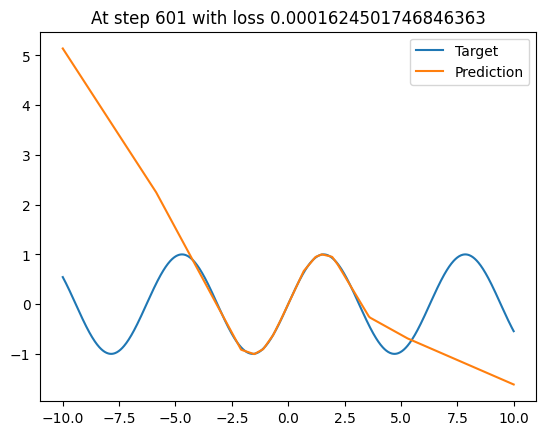

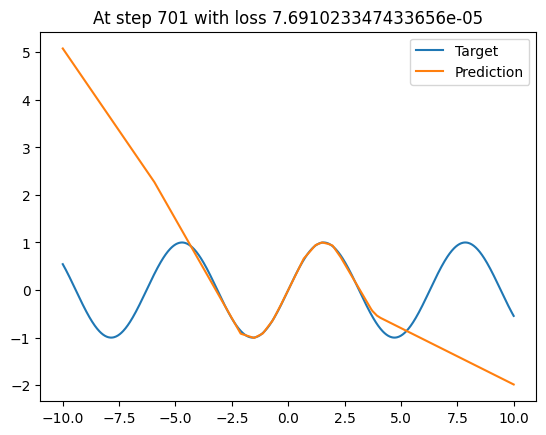

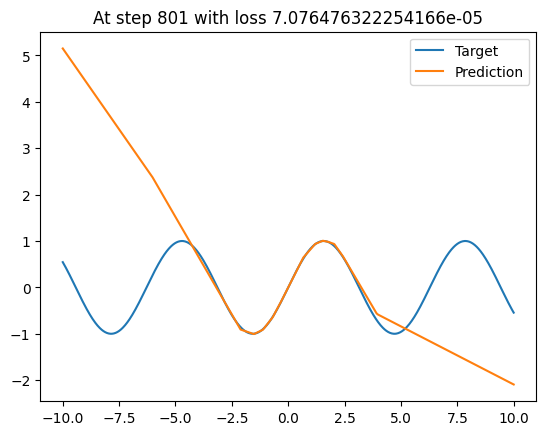

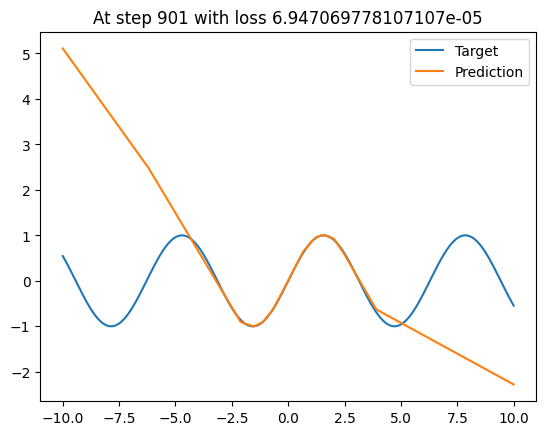

In [35]:
opt = torch.optim.Adam(net.parameters(), lr=0.01)
loss_fn = nn.MSELoss()

for step in range(1000):
    opt.zero_grad()

    x = torch.randn(100, 1).to(device)
    target = torch.sin(x).to(device)

    prediction = net(x)

    loss = loss_fn(prediction, target)
    loss.backward()

    opt.step()

    if step % 100 == 0:
        make_plot(net, f'At step {step+1} with loss {loss.item()}')


To try:

- How can you make it generalize better?
- Trade off between number of layers and neurons
- Learning rate?

Next:
- Training pipelines
- Logging
- Dynamics of loss surface
- Best practices